## 数据获取

In [2]:
from bs4 import BeautifulSoup  
import requests  
import time  
  
headers = {  
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'  
}  
  
for i in range(0, 1330, 35):  
    break
    print(i)  
    time.sleep(2)  
    url = 'https://music.163.com/discover/playlist/?cat=华语&order=hot&limit=35&offset=' + str(i)#修改这里即可  
    response = requests.get(url=url, headers=headers)  
    html = response.text  
    soup = BeautifulSoup(html, 'html.parser')  
    # 获取包含歌单详情页网址的标签  
    ids = soup.select('.dec a')  
    # 获取包含歌单索引页信息的标签  
    lis = soup.select('#m-pl-container li')  
    print(len(lis))  
    for j in range(len(lis)):  
        # 获取歌单详情页地址  
        url = ids[j]['href']  
        # 获取歌单标题  
        title = ids[j]['title']  
        # 获取歌单播放量  
        play = lis[j].select('.nb')[0].get_text()  
        # 获取歌单贡献者名字  
        user = lis[j].select('p')[1].select('a')[0].get_text()  
        # 输出歌单索引页信息  
        print(url, title, play, user)  
        # 将信息写入CSV文件中  
        with open('playlist.csv', 'a+', encoding='utf-8-sig') as f:  
            f.write(url + ',' + title + ',' + play + ',' + user + '\n')  
  
from bs4 import BeautifulSoup  
import pandas as pd  
import requests  
import time  
  
df = pd.read_csv('playlist.csv', header=None, error_bad_lines=False, names=['url', 'title', 'play', 'user'])  
  
headers = {  
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'  
}  
  
for i in df['url']:
    break
    time.sleep(2)  
    url = 'https://music.163.com' + i  
    response = requests.get(url=url, headers=headers)  
    html = response.text  
    soup = BeautifulSoup(html, 'html.parser')  
    # 获取歌单标题  
    title = soup.select('h2')[0].get_text().replace(',', '，')  
    # 获取标签  
    tags = []  
    tags_message = soup.select('.u-tag i')  
    for p in tags_message:  
        tags.append(p.get_text())  
    # 对标签进行格式化  
    if len(tags) > 1:  
        tag = '-'.join(tags)  
    else:  
        tag = tags[0]  
    # 获取歌单介绍  
    if soup.select('#album-desc-more'):  
        text = soup.select('#album-desc-more')[0].get_text().replace('\n', '').replace(',', '，')  
    else:  
        text = '无'  
    # 获取歌单收藏量  
    collection = soup.select('#content-operation i')[1].get_text().replace('(', '').replace(')', '')  
    # 歌单播放量  
    play = soup.select('.s-fc6')[0].get_text()  
    # 歌单内歌曲数  
    songs = soup.select('#playlist-track-count')[0].get_text()  
    # 歌单评论数  
    comments = soup.select('#cnt_comment_count')[0].get_text()  
    # 输出歌单详情页信息  
    print(title, tag, text, collection, play, songs, comments)  
    # 将详情页信息写入CSV文件中  
    with open('music_message.csv', 'a+', encoding='utf-8') as f:  
        # f.write(title + '/' + tag + '/' + text + '/' + collection + '/' + play + '/' + songs + '/' + comments + '\n')  
        f.write(title + ',' + tag + ',' + text + ',' + collection + ',' + play + ',' + songs + ',' + comments + '\n') 

C:\Users\y\AppData\Local\Temp\ipykernel_10592\2594341024.py:42: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('playlist.csv', header=None, error_bad_lines=False, names=['url', 'title', 'play', 'user'])
Skipping line 54: expected 4 fields, saw 5
Skipping line 69: expected 4 fields, saw 5
Skipping line 91: expected 4 fields, saw 5
Skipping line 141: expected 4 fields, saw 5
Skipping line 226: expected 4 fields, saw 5
Skipping line 336: expected 4 fields, saw 5
Skipping line 346: expected 4 fields, saw 5
Skipping line 639: expected 4 fields, saw 5
Skipping line 936: expected 4 fields, saw 5
Skipping line 1118: expected 4 fields, saw 5
Skipping line 1163: expected 4 fields, saw 5
Skipping line 1291: expected 4 fields, saw 5



## 数据预处理

In [23]:
df = pd.read_csv('music_message.csv', header=None,error_bad_lines=False ,names=['title', 'tag', 'text', 'collection','play','songs','comments']) 
df['collection'] = df['collection'].astype('string').str.strip()  
df['collection'] = [int(str(i).replace('万','0000')) for i in df['collection']]  
df['text'] = [str(i)[3:] for i in df['text']]  
df['comments'] = [0 if '评论' in str(i).strip() else int(i) for i in df['comments']]
df

C:\Users\y\AppData\Local\Temp\ipykernel_10592\2963511483.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('music_message.csv', header=None,error_bad_lines=False ,names=['title', 'tag', 'text', 'collection','play','songs','comments'])


,title,tag,text,collection,play,songs,comments
0,[云贝推歌精选] 云贝每周听友推歌精选,清新-流行-华语,云贝推歌你的热爱值得被听见每周听友推歌实力精选,5739,1776861,50,59
1,[快乐工作指南] 烦恼清空，快乐办公,华语-工作-快乐,生活似乎并没有一帆风顺。想对一直以来默默拼搏的你，说一声辛苦啦。休息时间记得多笑笑~,8930,2711922,30,53
2,[闽南语唱片行] 唱在嘴边，动情在心尖,华语-经典,闽南经典，劲歌载舞。回味经典，听爱情的愁苦，诉说对命运的不屈服，唱在嘴边，动情在心尖~,3784,1067427,25,18
3,[听·莫文蔚] 慢慢喜欢你，从这首歌起,华语-流行,"你说她性感，她就出其不意挑战“火鸡姐""这样开拓戏路的角色;你说她只是很会唱歌，她就交出一张包...",5149,1254916,50,5
4,[华语速爆新歌] thome的专属浪漫属于《YOU》,华语,优质华语新歌，网易云音乐每周精选推荐。本期封面：thomeboydontkill,3730000,1076211968,20,60456
...,...,...,...,...,...,...,...
1313,超甜每日|今天不emo,流行-华语-放松,看似艰难的选择不会让我退后，当我开始变得坚强还有固执，我不想像个普通人一样去度日，这世界就像...,47838,7542999,134,35
1314,听完那就释怀吧,华语-夜晚,听完就把那些该忘的忘了吧，那些忘不掉的人忘不掉的事，都会成为过往。,4556,594371,80,88
1315,你是要长大的小朋友 拜托撑着别倒下去,华语-流行-治愈,我想要有一个人 无论发生什么 我回头他都能用力紧紧抱着我 不离不弃如果你出现了 我一定会用尽...,31189,2825411,37,502
1316,网易云那些好听到爆歌曲（持续更新）,华语-流行-快乐,不定期暖心更新,7692,3568653,211,105


In [38]:
import matplotlib.pyplot as plt
import squarify
def get_matplot(x,y,chart,title,ha,size,color):  
    # 设置图片显示属性,字体及大小  
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  
    plt.rcParams['font.size'] = size  
    plt.rcParams['axes.unicode_minus'] = False  
    # 设置图片显示属性  
    fig = plt.figure(figsize=(16, 8), dpi=80)  
    ax = plt.subplot(1, 1, 1)  
    ax.patch.set_color('white')  
    # 设置坐标轴属性  
    lines = plt.gca()  
    # 设置显示数据  
    if x ==0:  
        pass  
    else:  
        x.reverse()  
        y.reverse()  
        data = pd.Series(y, index=x)  
    # 设置坐标轴颜色  
    lines.spines['right'].set_color('none')  
    lines.spines['top'].set_color('none')  
    lines.spines['left'].set_color((64/255, 64/255, 64/255))  
    lines.spines['bottom'].set_color((64/255, 64/255, 64/255))  
    # 设置坐标轴刻度  
    lines.xaxis.set_ticks_position('none')  
    lines.yaxis.set_ticks_position('none')  
    if chart == 'barh':  
        # 绘制柱状图,设置柱状图颜色  
        data.plot.barh(ax=ax, width=0.7, alpha=0.7, color=color)  
        # 添加标题,设置字体大小  
        ax.set_title(f'{title}', fontsize=18, fontweight='light')  
        # 添加歌曲出现次数文本  
        for x, y in enumerate(data.values):  
            plt.text(y+0.3, x-0.12, '%s' % y, ha=f'{ha}')  
    elif chart == 'hist':  
        # 绘制直方图,设置柱状图颜色  
        ax.hist(y, bins=30, alpha=0.7, color=(21/255, 47/255, 71/255))  
        # 添加标题,设置字体大小  
        ax.set_title(f'{title}', fontsize=18, fontweight='light')  
    elif chart == 'plot':  
        colors = ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',  
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',  
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',  
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',  
         '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',  
          '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50',  
          '#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff']  
        plot = squarify.plot(sizes=y, label=x, color=colors, alpha=1, value=y, edgecolor='white', linewidth=1.5)  
        # 设置标签大小为1  
        plt.rc('font', size=6)  
        # 设置标题大小  
        plot.set_title(f'{title}', fontsize=13, fontweight='light')  
        # 除坐标轴  
        plt.axis('off')  
        # 除上边框和右边框刻度  
        plt.tick_params(top=False, right=False)  
    # 显示图片  
    plt.show()  
#构建color序列  
color = [(153/255, 0/255, 102/255),(8/255, 88/255, 121/255),(160/255, 102/255, 50/255),(136/255, 43/255, 48/255),(16/255, 152/255, 168/255),(153/255, 0/255, 102/255)]  

## 歌曲播放量TOP10 

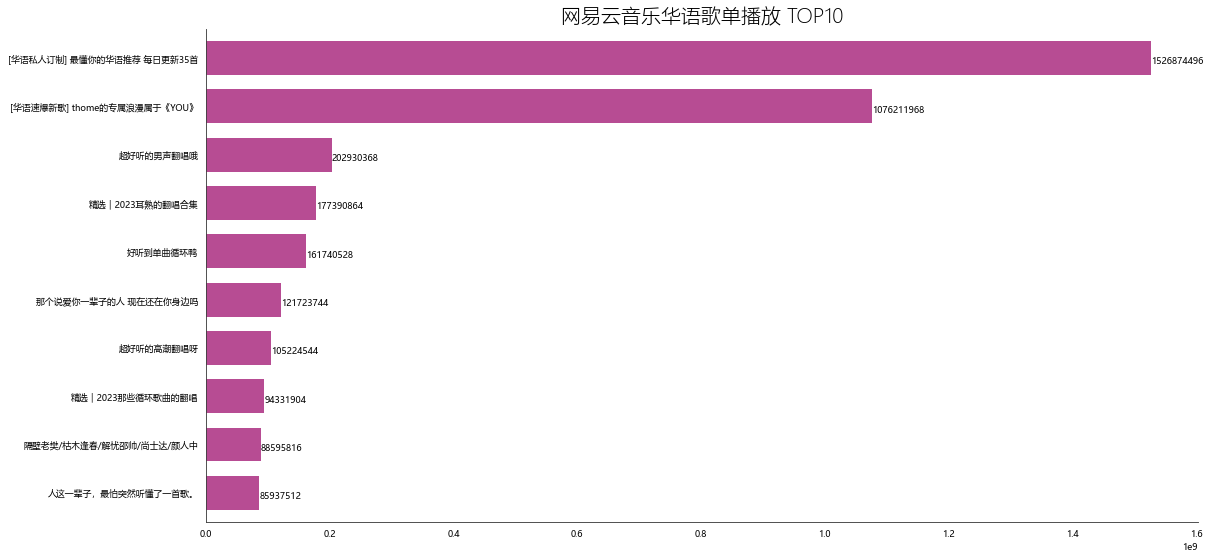

In [32]:
df_play = df[['title','play']].sort_values('play',ascending=False)  
df_play[:10]  
df_play = df_play[:10]  
_x = df_play['title'].tolist()  
_y = df_play['play'].tolist()  
df_play = get_matplot(x=_x,y=_y,chart='barh',title='网易云音乐华语歌单播放 TOP10',ha='left',size=8,color=color[0])  
df_play  

## 歌曲收藏量

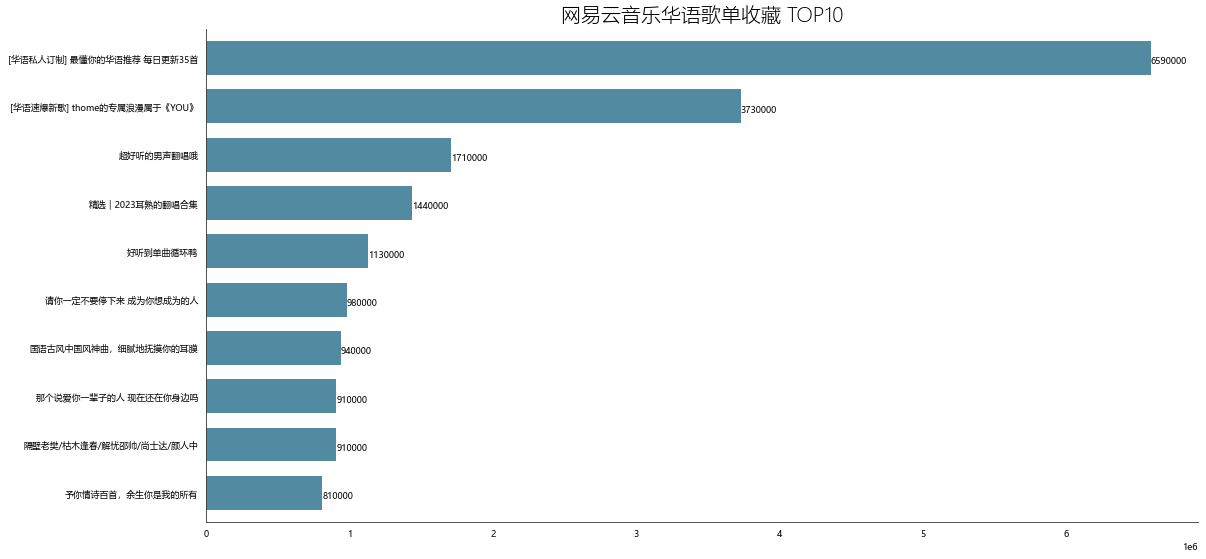

In [33]:
df_col = df[['title','collection']].sort_values('collection',ascending=False)  
df_col[:10]  
df_col = df_col[:10]  
_x = df_col['title'].tolist()  
_y = df_col['collection'].tolist()  
df_col = get_matplot(x=_x,y=_y,chart='barh',title='网易云音乐华语歌单收藏 TOP10',ha='left',size=8,color=color[1])  
df_col  

## 歌曲评论数TOP10

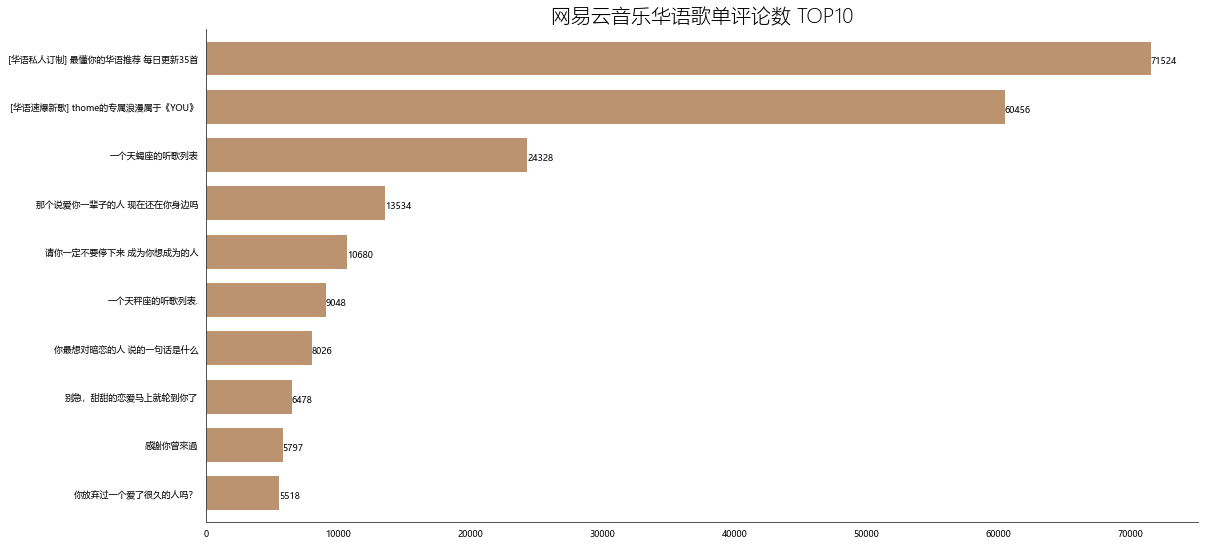

In [34]:
df_com = df[['title','comments']].sort_values('comments',ascending=False)  
df_com[:10]  
df_com = df_com[:10]  
_x = df_com['title'].tolist()  
_y = df_com['comments'].tolist()  
df_com = get_matplot(x=_x,y=_y,chart='barh',title='网易云音乐华语歌单评论数 TOP10',ha='left',size=8,color=color[2])  
df_com  

## 歌曲歌单收录情况分布

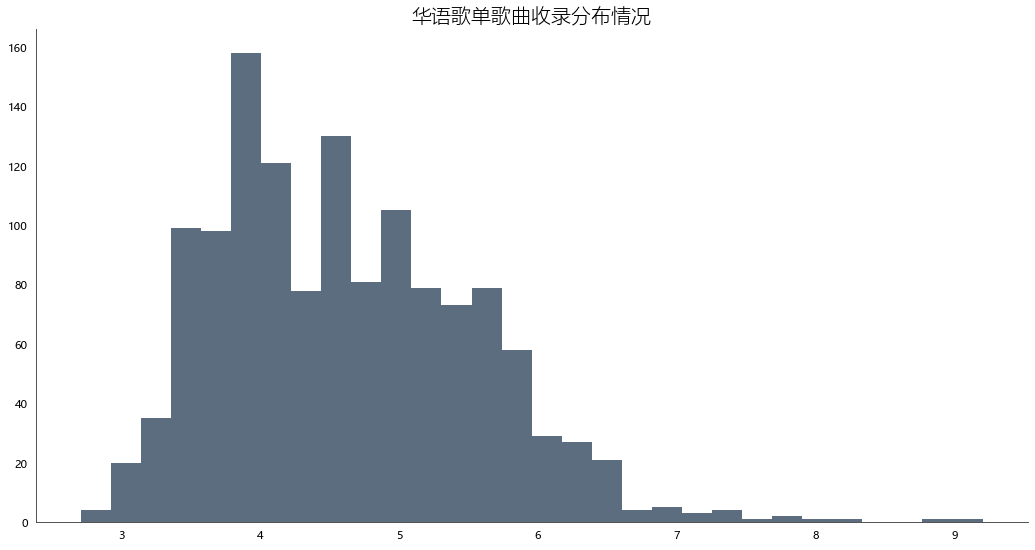

In [36]:
import numpy as np
df_songs = np.log(df['songs'])  
df_songs  
df_songs = get_matplot(x=0,y=df_songs,chart='hist',title='华语歌单歌曲收录分布情况',ha='left',size=10,color=color[3])  
df_songs  

## 歌曲标签图

C:\Users\y\AppData\Local\Temp\ipykernel_10592\1279941773.py:15: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Series = df.iloc[:,7:].sum().sort_values(0,ascending=False)


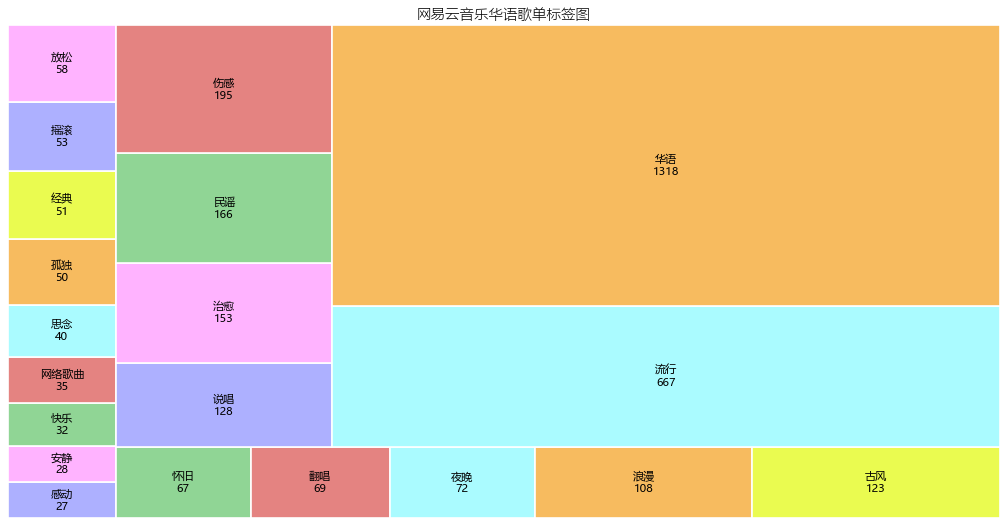

In [39]:
def get_tag(df):  
    df = df['tag'].str.split('-')  
    datalist = list(set(x for data in df for x in data))  
    return  datalist  
df_tag = get_tag(df)  
# df_tag  
def get_lx(x,i):  
    if i in str(x):  
        return 1  
    else:  
        return 0  
for i in list(df_tag):#这里的df['all_category'].unique()也可以自己用列表构建，我这里是利用了前面获得的  
    df[i] = df['tag'].apply(get_lx,i=f'{i}')  
# df.head()  
Series = df.iloc[:,7:].sum().sort_values(0,ascending=False)  
df_tag = [tag for tag in zip(Series.index.tolist(),Series.values.tolist())]  
df_tag[:10]  
df_iex = [index for index in Series.index.tolist()][:20]  
df_tag = [tag for tag in Series.values.tolist()][:20]  
df_tagiex = get_matplot(x=df_iex,y=df_tag,chart='plot',title='网易云音乐华语歌单标签图',size=10,ha='center',color=color[3])  
df_tagiex  

## 歌单贡献up主Top10

C:\Users\y\AppData\Local\Temp\ipykernel_10592\1570397364.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_user = pd.read_csv('playlist.csv',encoding="utf-8",header=0,names=['url','title','play','user'],sep=',',error_bad_lines=False)
Skipping line 54: expected 4 fields, saw 5
Skipping line 69: expected 4 fields, saw 5
Skipping line 91: expected 4 fields, saw 5
Skipping line 141: expected 4 fields, saw 5
Skipping line 226: expected 4 fields, saw 5
Skipping line 336: expected 4 fields, saw 5
Skipping line 346: expected 4 fields, saw 5
Skipping line 639: expected 4 fields, saw 5
Skipping line 936: expected 4 fields, saw 5
Skipping line 1118: expected 4 fields, saw 5
Skipping line 1163: expected 4 fields, saw 5
Skipping line 1291: expected 4 fields, saw 5



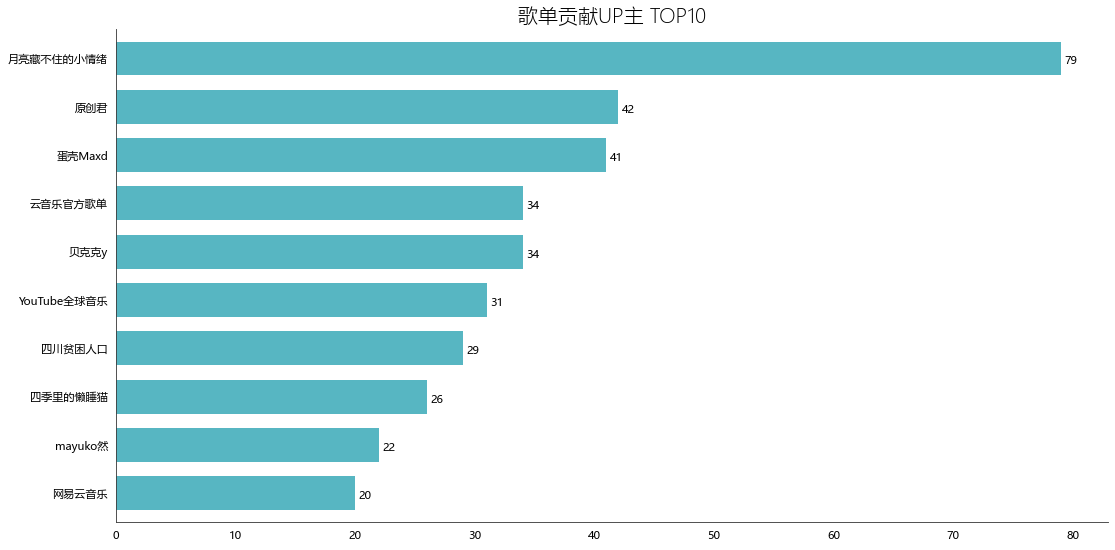

In [42]:
df_user = pd.read_csv('playlist.csv',encoding="utf-8",header=0,names=['url','title','play','user'],sep=',',error_bad_lines=False)  
df_user.shape  
df_user = df_user.iloc[:,1:]  
df_user['count'] = 0  
df_user = df_user.groupby('user',as_index=False)['count'].count()  
df_user = df_user.sort_values('count',ascending=False)[:10]  
df_user  
df_user = df_user[:10]  
names = df_user['user'].tolist()  
nums = df_user['count'].tolist()  
df_u = get_matplot(x=names,y=nums,chart='barh',title='歌单贡献UP主 TOP10',ha='left',size=10,color=color[4])  
df_u  

## 歌单名生成词云

In [70]:
import wordcloud  
import pandas as pd  
import numpy as np  
from PIL import Image  
data = pd.read_excel('music_message.xlsx',names=['url', 'title', 'play', 'user'])  
#根据播放量排序，只取前五十个  
data = data.sort_values('play',ascending=False).head(50)  
  
#font_path指明用什么样的字体风格，这里用的是电脑上都有的微软雅黑  
w1 = wordcloud.WordCloud(width=1000,height=700,  
                         background_color='black',  
                         font_path='msyh.ttc')  
words=[i for i in data['title'].to_dict().keys()]
txt=''
for i in words:
    for j in range(2):
        txt+=i[j]
    txt+='\n'
# txt = "\n".join(i for i in words)
print(txt)
w1.generate(txt)  
w1.to_file('.\词云.png')  

一个你听不完的【古风】歌单华语-古风
是微风 是晚霞 是心跳不止 是无可代替华语-流行-翻唱
Rap说唱乐_每日新歌华语-说唱-酒吧
超神韵脚。（抓耳旋律爆炸国产RAP）华语-说唱-兴奋
贵州音乐：民歌／乐队／说唱/2022总汇民谣-民族-华语
恋爱啦|甜妹的专属歌单华语-韩语-流行
戴上耳机♫这一刻世界属于你华语-流行
一个天蝎座的听歌列表华语-流行-浪漫
落日飞车|橘子海|甜約翰|卧轨|Deca| 椅子华语-另类/独立-摇滚
hook好听的华语说唱说唱-华语
直播的所有歌单华语-欧美-民谣
那些歌词里的欲言又止。华语-流行-伤感
吴侬软语 江南小调（苏州话上海话）华语-夜晚-浪漫
向江南折过花，对春风与红蜡古风-华语
好听却记不起歌名的歌华语-流行
flow好听到爆燃到爆的说唱华语-说唱-00后
♥︎Rap BEAT♥︎——【说唱伴奏】CHILL说唱-流行-华语
有很多的rapper情歌华语-说唱-思念
【武侠】我本江湖人，当为江湖魂华语-古风-兴奋
只有几十秒的歌词都是直击心灵【铃声版】华语-流行-翻唱
旋律说唱丨循环系列说唱-R&B/Soul-华语
一个双子座听歌的列表清新-治愈-华语
薛之谦/邓紫棋/林俊杰/张杰/李荣浩等……华语-流行-散步
好听到爆的翻唱系列（持续更新）华语-流行-翻唱
适合随机播放的歌单华语-夜晚-安静
ʘʚʘ好听的旋律 觉得不是那我木得办法华语-散步-快乐
锦零/程嘉敏/阮豆/秋仁/西二/大柯/王舒流行-00后-华语
甜味Rap/轻轻吧唧你一口说唱-浪漫-华语
超好听的男声翻唱哦翻唱-流行-华语
活的很怂 听了很是心疼华语-民谣-孤独
「说唱hiphop 【中文精选】Made in China华语-流行-说唱
「冷门古风」没听过的都是惊喜华语-古风-流行
『中文rap』诗人般的饶舌中文说唱艺术说唱-华语-运动
国产HipHop从地下到地上华语-说唱-榜单
网易云热歌：百首好听宝藏热歌精选华语-流行-民谣
好听到单曲循环的神仙歌曲华语-流行-网络歌曲
超好听的女生翻唱华语-流行-翻唱
2021古风歌曲新歌古风-流行-华语
一个天秤座的听歌列表.华语-流行-放松
雨会停雾会散总要跟过去说再见l温柔男声华语-流行-浪漫
【 人声测试 】柔甜细腻 胆声胆色 清澈通透华语-流行-90后
一个双子座的民谣歌单民谣-华语-轻音乐
聆听优质的中文说